# Emotion Detector using Random Forest Classifier Project
## Importing All required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer



About Dataset
Emotions Detection Dataset
This dataset is a comprehensive collection of text samples labeled with emotions. It is designed for training and testing emotion detection models using Natural Language Processing (NLP) techniques.
A freely available dataset for emotion detection from text, designed to support researchers, developers, and enthusiasts in building and improving emotion analysis models.

Dataset Details

Data Type: Text

File Format: CSV

Emotion Categories:

😊 Joy

😢 Sadness

😨 Fear

😡 Anger

😲 Surprise

Key Features

Pre-labeled text samples for supervised learning tasks.

Easy to integrate into machine learning pipelines.

Open for all to use and modify.


Usage

This dataset is ideal for researchers and developers working on emotion detection, sentiment analysis, or other NLP tasks.

## Loading the data


In [2]:
data=pd.read_csv("emotion_dataset.csv")
data

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


## Exploratory Data Analysis(EDA)
The data shape is (34791,2)

The data has missing values in clean_text column but i think that i will not remove them as we will train our model only on text not on clean_text column as both are almost same, so that our model not get confused.

Most of the emotions are of joy and least are of shame


In [3]:
data.shape
data.info()
data.head()
data['Emotion'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [4]:
# Missing value
data.isnull().sum().sort_index(ascending=True)

Clean_Text    466
Emotion         0
Text            0
Unnamed: 0      0
dtype: int64

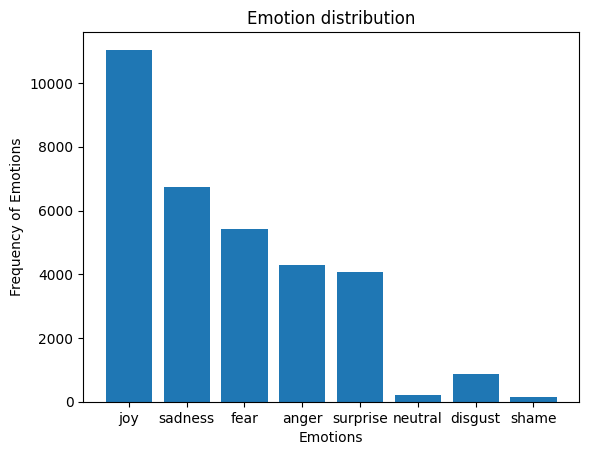

In [5]:
# visulizing the data
Frequency_of_each_emotion=[11045,6722,5410,4297,4062,225,856,146]
emotions=['joy', 'sadness', 'fear','anger',"surprise","neutral",'disgust','shame']
plt.bar(emotions,Frequency_of_each_emotion)

plt.title("Emotion distribution")
plt.xlabel("Emotions")
plt.ylabel("Frequency of Emotions")
plt.show()

In [6]:
data.columns

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')

In [7]:
# As we donot want id and clean_text columns so we will remove them from data
data=data[["Emotion","Text"]]
data.head()


,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [8]:
# Creating X and y 
X=data["Text"]
y=data["Emotion"]
print(len(X))
print(len(y))

34792
34792


## Natural Language Processing
### Stemming

In [9]:
import re
ps=PorterStemmer()
corpus=[]

for i in range(0,len(X)):
    review=re.sub("[^a-zA-Z]"," ",X[i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words("English")]
    review=" ".join(review)
    corpus.append(review)

### Extracting vocabulory and vocabulory size

In [10]:
# Extracting the vocabulary from corpus 
vocabulory=[]
i=0
for each in corpus:
    words=word_tokenize(each)
    for word in words:
        if word not in vocabulory:
            vocabulory.append(word)


In [11]:
# Checking the vocabulory and getting vocabulory size
import pandas as pd
voc=pd.Series(vocabulory)
print(voc.duplicated().sum())
voc_size=len(vocabulory)
print("Vocabulory size is: ",voc_size)

0
Vocabulory size is:  28581


## Machine Learning
### Vectorization of X using tfidf vectorizer

In [12]:
# Initializing TF-IDF Vectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=500)

# Applying Tf-idf on X and y
X_features=tfidf_vectorizer.fit_transform(X)

# Printing shape of X and y_features
print("Shape of X_features is ",X_features.shape)



Shape of X_features is  (34792, 500)


### Encoding y


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

### Train Test split of data


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_features,y,train_size=0.8,test_size=0.2,random_state=42)

### Model Initilization
In model , the parameter n_estimators means the number of trees in forest

In [15]:
rf_model=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=42)

### Training the model


In [16]:
y_train

array([3, 4, 2, ..., 2, 5, 0])

In [17]:
rf_model.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

### Making predictions

In [23]:
y_pred=rf_model.predict(X_test)

### Testing and Metrices


In [24]:
# Accuracy Score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score of model is",accuracy)

Accuracy Score of model is 0.5756574220433971


In [25]:
## Classification report
cr=classification_report(y_test,y_pred)
print("Classification Report\n",cr)

Classification Report
               precision    recall  f1-score   support

           0       0.68      0.41      0.51       836
           1       0.58      0.03      0.07       202
           2       0.79      0.60      0.68      1104
           3       0.50      0.87      0.63      2214
           4       0.72      0.63      0.67       481
           5       0.56      0.45      0.50      1327
           6       1.00      0.04      0.08        23
           7       0.70      0.23      0.34       772

    accuracy                           0.58      6959
   macro avg       0.69      0.41      0.44      6959
weighted avg       0.62      0.58      0.55      6959



In [26]:
## Confusion Matrix
cf=confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cf)

Confusion Matrix
 [[ 345    1   43  332   13   96    0    6]
 [  12    7    4  138    2   35    0    4]
 [  34    2  657  307   26   65    0   13]
 [  30    0   44 1929   41  139    0   31]
 [  10    0    8  109  302   45    0    7]
 [  51    2   36  613   21  591    0   13]
 [   1    0    1   15    0    4    1    1]
 [  25    0   36  439   15   83    0  174]]


## Saving the model

In [27]:
import joblib
joblib.dump(rf_model,"Emotion Detector using Random Forest.joblib",compress=3)

['Emotion Detector using Random Forest.joblib']

## Saving the label encoder and tf-idf vectorizer

In [22]:
import joblib
# Saving the label Encoder
joblib.dump(le, "Label Encoder of Emotion Detector using Random Forest.joblib")

# Saving the TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, "TF-IDF Vectorizer of Emotion Detector using Random Forest.joblib")

['TF-IDF Vectorizer of Emotion Detector using Random Forest.joblib']